# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [1]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
import matplotlib

     |████████████████████████████████| 13.0MB 73kB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1


# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



Let $G = (V,E)$ the graph in question, and let $W$ be the similarity matrix of its nodes. We set its symmetric laplacian $L_{sym}$ as the matrix:

$$L_{sym} = D^{-1/2}WD^{-1/2},\text{ where } D \text{ is a diagonal matrix with } D_i = \sum_j w_{ij}$$
The Normalized Cut correponds to solving the following optimization problem:

$$\min_{f \in \mathbb{R}}{f^TL_{sym}f}, \text{ where } f \text{ is orthogonal to } D^{-1/2} 1 \text{ and } ||f||^2 = Vol(V)$$

In [0]:
# Part 1: Spectral Clustering


def spectral_clustering(X):
     
    import numpy
    import scipy
    from sklearn.cluster import KMeans

    from sklearn.neighbors import radius_neighbors_graph
    from sklearn.neighbors import kneighbors_graph
    A = radius_neighbors_graph(X,6,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
    # A = kneighbors_graph(X_mn, 2, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False)
    affinity = A.toarray()
    n_clusters=2
    '''
    D = numpy.zeros(affinity.shape)
    w = numpy.sum(affinity, axis=0)
    D.flat[::len(w) + 1] = w ** (-0.5)  # set the diag of D to w
    L= D.dot(affinity).dot(D)
    '''
    from scipy.sparse import csgraph
    L = csgraph.laplacian(affinity, normed=True)
    eigval, eigvec = np.linalg.eig(L)
    np.where(eigval == np.partition(eigval, 1)[1])# the second smallest eigenvalue
    Y_pred = eigvec[:,1].copy()
    Y_pred[Y_pred< 0] = 0
    Y_pred[Y_pred > 0] = 1
  
    return Y_pred


## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [0]:
# DO NOT EDIT

from sklearn.datasets import make_circles 
import matplotlib as mpl
import matplotlib.pyplot as plt

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]



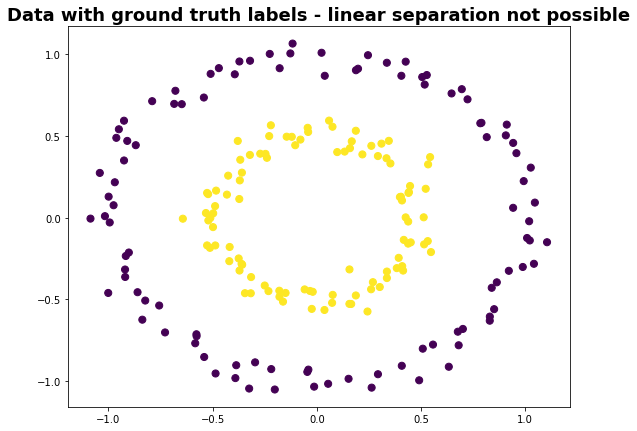

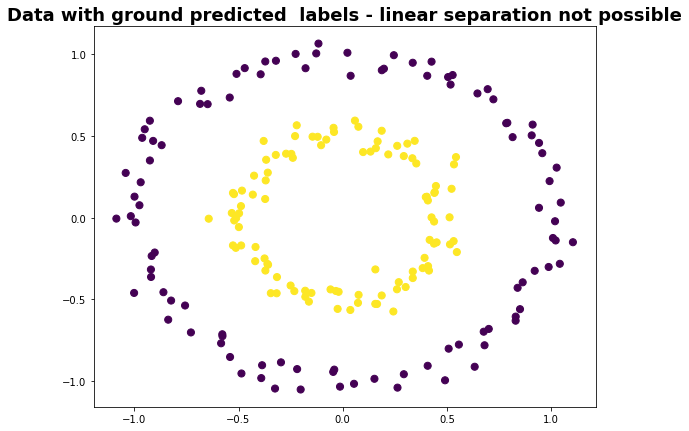

In [102]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(CX[:, 0], CX[:, 1],c=CY,s=dot_size, cmap=cmap)
label=spectral_clustering(CX)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground predicted  labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(CX[:, 0], CX[:, 1],c=label ,s=50, cmap='viridis')

## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [103]:
# Part 3: Report the accuracy of clustering
 from sklearn.metrics import accuracy_score
 accuracy_score(CY, label)

1.0



---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

In [0]:
# Part 1: MDS
def center1(K):
    """
    Method to center the distance matrix
    :param K: numpy array of shape mxm
    :return: numpy array of shape mxm
    """
    n_samples = K.shape[0]

    # Mean for each row/column
    meanrows = np.sum(K, axis=0) / n_samples
    meancols = (np.sum(K, axis=1)/n_samples)[:, np.newaxis]

    # Mean across all rows (entire matrix)
    meanall = meanrows.sum() / n_samples

    K -= meanrows
    K -= meancols
    K += meanall
    return K


def MDS(data,k,n_components=2):
    """
    Apply multidimensional scaling (aka Principal Coordinates Analysis)
    :param data: nxn square distance matrix
    :param n_components: number of components for projection
    :return: projected output of shape (n_components, n)
    """

    # Center distance matrix
    #center(data)
    
    from sklearn.preprocessing import StandardScaler

    
    data = sklearn.metrics.pairwise_distances(data)#distance_mat(X, k) #np pairwise distancesws
    scaler = StandardScaler()
    data= scaler.fit_transform(data)
    data= center1(data)

    
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_val_cov, eig_vec_cov = np.linalg.eig(data)
    eig_pairs = [
        (np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))
    ]
        # Select n_components eigenvectors with largest eigenvalues, obtain subspace transform matrix
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = np.array(eig_pairs)
    matrix_w = np.hstack(
        [eig_pairs[i, 1].reshape(data.shape[1], 1) for i in range(n_components)]
    )

    # Return samples in new subspace
    return matrix_w




  

## Part 2: LLE
Implement Locally Linear Embedding function

In [0]:
# Part 2: LLE
def distance_mat_LLE(X, n_neighbors=10):
    """
    Compute the square distance matrix using Euclidean distance
    :param X: Input data, a numpy array of shape (img_height, img_width)
    :param n_neighbors: Number of nearest neighbors to consider, int
    :return: numpy array of shape (img_height, img_height), numpy array of shape (img_height, n_neighbors)
    """
    def dist(a, b):
        return np.sqrt(sum((a - b)**2))

    # Compute full distance matrix
    distances = np.array([[dist(p1, p2) for p2 in X] for p1 in X])

    # Keep only the 6 nearest neighbors, others set to 0 (= unreachable)
    neighbors = np.zeros_like(distances)
    sort_distances = np.argsort(distances, axis=1)[:, 1:51+1]
    for k,i in enumerate(sort_distances):
        neighbors[k,i] = distances[k,i]
    return neighbors, sort_distances

def LLE(data, n_components=2, n_neighbors=6):
    """
    Dimensionality reduction with FastLLE algorithm
    :param data: input image matrix of shape (n,m)
    :param n_components: number of components for projection
    :param n_neighbors: number of neighbors for the weight extraction
    :return: Projected output of shape (n_components, n)
    """
    # Compute the nearest neighbors
    _, neighbors_idx = distance_mat_LLE(data, n_neighbors)

    n = data.shape[0]
    w = np.zeros((n, n))
    for i in range(n):
        # Center the neighbors matrix
        k_indexes = neighbors_idx[i, :]
        neighbors = data[k_indexes, :] - data[i, :]

        # Compute the corresponding gram matrix
        gram_inv = np.linalg.pinv(np.dot(neighbors, neighbors.T))

        # Setting the weight values according to the lagrangian
        lambda_par = 2/np.sum(gram_inv)
        w[i, k_indexes] = lambda_par*np.sum(gram_inv, axis=1)/2
    m = np.subtract(np.eye(n), w)
    values, u = np.linalg.eigh(np.dot(np.transpose(m), m))
    return u[:, 1:n_components+1]

## Part 3: ISOMAP
Implement Isomap Visualization  

The Isomap algorithm can be considered as a modification of the classic Multidimensional Scaling algorithm. The algorithm itself consists of the following steps:

For each feature vector $ x \in X $ find $ k $ its nearest neighbors and construct the sparse neighborhood graph.

Compute squared distances matrix $ D $ such as $ D_{i,j} = d^2(x_i,x_j) $.

Relax distances with shortest (so-called geodesic) distances on the sparse neighborhood graph (e.g. with Dijkstra's algorithm).

Center the matrix $ D $ with subtracting row mean, column mean and adding the grand mean. Multiply $ D $ element-wise with $ -0.5 $.

Compute embedding with the $ t$ eigenvectors that correspond to the largest eigenvalues of the matrix $ D $; normalize these vectors with dividing each eigenvector by the square root of its corresponding eigenvalue. Form the final embedding with eigenvectors as rows and projected feature vectors as columns.

In [0]:
# Part 3: Isomap
def center(K):
    """
    Method to center the distance matrix
    :param K: numpy array of shape mxm
    :return: numpy array of shape mxm
    """
    n_samples = K.shape[0]

    # Mean for each row/column
    meanrows = np.sum(K, axis=0) / n_samples
    meancols = (np.sum(K, axis=1)/n_samples)[:, np.newaxis]

    # Mean across all rows (entire matrix)
    meanall = meanrows.sum() / n_samples

    K -= meanrows
    K -= meancols
    K += meanall
    return K



def mds_1(data,k, n_components=2):
    """
    Apply multidimensional scaling (aka Principal Coordinates Analysis)
    :param data: nxn square distance matrix
    :param n_components: number of components for projection
    :return: projected output of shape (n_components, n)
    """

    # Center distance matrix
    data=center1(data)
    z = numpy.zeros((max(data.shape), max(data.shape)))
    z[:data.shape[0],:data.shape[1]] = data
    data = z

    # Make a list of (eigenvalue, eigenvector) tuples
    eig_val_cov, eig_vec_cov = np.linalg.eig(data)
    eig_pairs = [
        (np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))
    ]

    # Select n_components eigenvectors with largest eigenvalues, obtain subspace transform matrix
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = np.array(eig_pairs)
    matrix_w = np.hstack(
        [eig_pairs[i, 1].reshape(data.shape[1], 1) for i in range(n_components)]
    )

    # Return samples in new subspace
    return matrix_w



def distance_mat_1(X, n_neighbors=10):
    """
    Compute the square distance matrix using Euclidean distance
    :param X: Input data, a numpy array of shape (img_height, img_width)
    :param n_neighbors: Number of nearest neighbors to consider, int
    :return: numpy array of shape (img_height, img_height), numpy array of shape (img_height, n_neighbors)
    """
    def dist(a, b):
        return np.sqrt(sum((a - b)**2))

    # Compute full distance matrix
    distances = np.array([[dist(p1, p2) for p2 in X] for p1 in X])

    # Keep only the 6 nearest neighbors, others set to 0 (= unreachable)
    neighbors = np.zeros_like(distances)
    sort_distances = np.argsort(distances, axis=1)[:, 1:10+1]
    for k,i in enumerate(sort_distances):
        neighbors[k,i] = distances[k,i]
    return neighbors, sort_distances

def isomap(data,n_neighbors, n_components):
    """
    Dimensionality reduction with isomap algorithm
    :param data: input image matrix of shape (n,m) if dist=False, square distance matrix of size (n,n) if dist=True
    :param n_components: number of components for projection
    :param n_neighbors: number of neighbors for distance matrix computation
    :return: Projected output of shape (n_components, n)
    """
    # Compute distance matrix
    data, _ = distance_mat_1(data, n_neighbors)

    # Compute shortest paths from distance matrix
    from sklearn.utils.graph import graph_shortest_path
    graph = graph_shortest_path(data, directed=False)
    graph = -0.5 * (graph ** 2)

    # Return the MDS projection on the shortest paths graph
    return mds_1(graph, n_components)
   

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [0]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

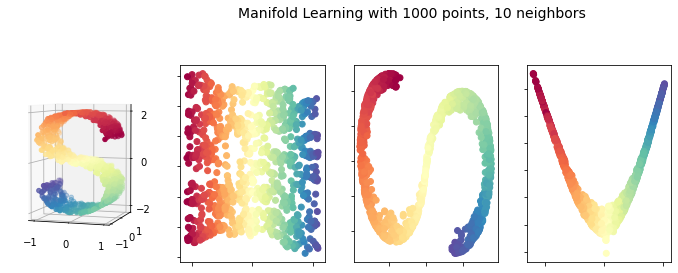

In [249]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter


# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(SX[:, 0], SX[:, 1], SX[:, 2], c=St, cmap=plt.cm.Spectral)
ax.view_init(4, -72)


# Plot results
Y=isomap(SX,n_neighbors, n_components)
i=0
ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
ax.scatter(Y[:, 0], Y[:, 1], c=St, cmap=plt.cm.Spectral)

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')




Y=MDS(SX,n_neighbors, n_components)

i=1
ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
ax.scatter(Y[:, 0], Y[:, 1], c=St, cmap=plt.cm.Spectral)

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')




Y=LLE(SX)

i=2
ax = fig.add_subplot(2, 5, 2 + i + (i > 3))

ax.scatter(Y[:, 0], Y[:, 1], c=St, cmap=plt.cm.Spectral)

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')

plt.show()



# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [256]:
# Swiss roll dataset loading here
d = []
with open('/content/swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)
print(swissroll)

(1600, 3)
[[ -5.214647     7.0879738    6.7292474 ]
 [ -0.42176168   8.4266375    7.896089  ]
 [ -6.1346009    5.6864362    6.0885666 ]
 ...
 [ 12.440832    12.176057    -1.0322797 ]
 [  9.6128784   11.898241    -7.0691012 ]
 [ -0.94566403  11.501216   -10.867711  ]]


Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

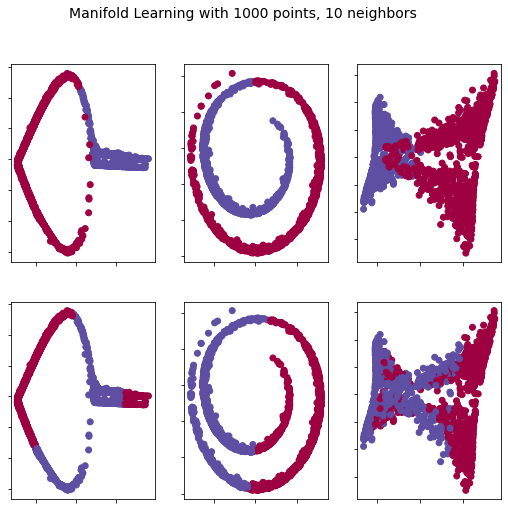

In [298]:
# CODE HERE
import matplotlib.pyplot as plt1
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
label=spectral_clustering(swissroll)




X_std = StandardScaler().fit_transform(swissroll)

# Run local implementation of kmeans
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
labels = km.predict(X_std)

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

Y=isomap(swissroll,10, 2)
i=0
ax1 = fig.add_subplot(2, 5, 2 + i + (i > 3))
ax1.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.axis('tight')




Y=MDS(swissroll,10, 2)

i=1
ax1 = fig.add_subplot(2, 5, 2 + i + (i > 3))
ax1.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.axis('tight')


Y=LLE(swissroll)

i=2
ax1 = fig.add_subplot(2, 5, 2 + i + (i > 3))

ax1.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.axis('tight')


Y=isomap(swissroll,10, 2)
i=4
ax1 = fig.add_subplot(2, 5, 2 + i + (i > 3))
ax1.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Spectral)

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.axis('tight')




Y=MDS(swissroll,10, 2)

i=5
ax1 = fig.add_subplot(2, 5, 2 + i + (i > 3))
ax1.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Spectral)

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.axis('tight')


Y=LLE(swissroll)

i=6
ax1 = fig.add_subplot(2, 5, 2 + i + (i > 3))

ax1.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Spectral)

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.axis('tight')


plt1.show()





---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [308]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

Using TensorFlow backend.


170500096/170498071 [==============================] - 5s 0us/step


In [0]:
def reductionUsingPCA(X, k, output_dim):
    from sklearn.decomposition import PCA
  
    p_object = PCA(output_dim)
    pca_X = p_object.fit_transform(X)
    return p_object, pca_X

    

In [0]:
def reductionUsingISOMAP(X, k, output_dim):
    from sklearn import manifold
    
    isomap_obj = manifold.Isomap(k, output_dim)
    isomap_X = isomap_obj.fit_transform(X)
    return isomap_obj, isomap_X

In [0]:



def classification(x_train, y_train, x_test, n_classes):
    from sklearn.svm import SVC
    c = SVC()
    c.fit(X_train, y_train)

    y_pred = c.predict(X_test)
    
    return y_pred


In [0]:


def F1_score(y_true, y_pred):
  from sklearn.metrics import f1_score
  score = f1_score(y_true, y_pred, average='micro')
  #print("F1 score :", score)
  return score

In [313]:
pca_obj, X_train = reductionUsingPCA(X_train, 0, 200)
X_test = pca_obj.transform(X_test)
y_pred = classification(X_train, y_train, X_test, n_classes=10)
score = F1_score(y_test, y_pred)
print("F1 score using PCA reduction:", score)






/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score using PCA reduction: 0.427


In [315]:
iso, X_train = reductionUsingISOMAP(X_train, 3, 200)
X_test = iso.transform(X_test)
y_pred = classification(X_train, y_train, X_test, n_classes=10)
score = F1_score(y_test, y_pred)
print("F1 score using ISOMAP reduction:", score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score using ISOMAP reduction: 0.335
